# Sklearn

## sklearn.linear_model

In [1]:
from matplotlib.colors import ListedColormap
from sklearn import cross_validation, datasets, linear_model, metrics

import numpy as np

/home/ayan/anaconda3/lib/python3.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Линейная регрессия

#### Генерация данных

In [3]:
data, target, coef = datasets.make_regression(n_features = 2, n_informative = 1, n_targets = 1, 
                                              noise = 5., coef = True, random_state = 2)
# две фичи, одна из них информативная, одна избыточная
# также добавили шум(noise)
# coef=True значит что метод возвращает не только данные и метки, но и также уравнение(параметры, y=a+b*x1+...) 

In [14]:
data
# x1 и x2, а значения y берутся из target

array([[-1.13431848e+00, -7.07420888e-01],
       [-2.76179492e-01, -5.16883894e-01],
       [-4.62005348e-01,  3.50888494e-01],
       [ 3.65053516e-01,  7.74082033e-01],
       [-1.02141473e+00,  4.32395701e-01],
       [-3.13508197e-01,  7.71011738e-01],
       [-4.54227855e-01,  5.14370717e-01],
       [-4.16757847e-01, -5.62668272e-02],
       [-1.25542722e+00,  9.38163671e-01],
       [ 1.00036589e+00, -3.81092518e-01],
       [-1.73795950e+00,  1.04082395e+00],
       [-1.54667461e+00, -2.08265194e+00],
       [ 2.04207979e-01,  1.40669624e+00],
       [-2.13619610e+00,  1.64027081e+00],
       [ 4.33496330e-01,  1.27837923e+00],
       [-4.68346260e-01, -1.25472031e+00],
       [-2.69056960e-01,  2.23136679e+00],
       [-3.25049628e-01, -5.60234506e-01],
       [-9.02246068e-01, -5.90972275e-01],
       [-1.41881055e+00, -2.51774118e-01],
       [ 6.95119605e-01, -2.03346655e+00],
       [-1.09873895e+00,  1.58448706e+00],
       [-6.53250268e-01,  8.42456282e-01],
       [ 3.

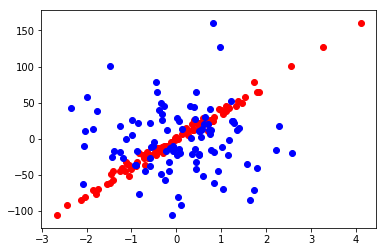

In [7]:
pylab.scatter(list(map(lambda x:x[0], data)), target, color = 'r')
pylab.scatter(list(map(lambda x:x[1], data)), target, color = 'b')

In [8]:
train_data, test_data, train_labels, test_labels = cross_validation.train_test_split(data, target,  
                                                                                     test_size = 0.3)

#### LinearRegression

In [12]:
linear_regressor = linear_model.LinearRegression()
linear_regressor.fit(train_data, train_labels)
predictions = linear_regressor.predict(test_data)
# опять же, с помощью fit обучаем модель на обуч выборке

In [13]:
print (test_labels)
#  это ответы на тестовой выборке (метки)

[  17.64282734  -45.27502383   11.74073026   19.66406455  -63.4056294
  -17.27897399  -37.31870104   25.24428409   24.82763821  -61.47026695
    5.86887774   25.7124082   -71.3715844   -21.48288019   -1.42235396
   20.87713077  -32.92158843  -10.06708677  160.09441244  -44.51417742
   27.83791274  -40.84204295  126.64909941  -12.0017312    23.87701013
  -16.79027112 -105.77758163   24.47584129   -4.38652971   44.66274342]


In [15]:
print (predictions)
# то что мы предсказали по тестовой выборке

[  21.67849432  -48.12132673   14.32269116   26.49325177  -60.65020346
  -13.56160538  -35.2959284    14.55760946   30.69399007  -56.85611509
    4.6432581    27.85727832  -71.21752849  -24.5499377    -0.67765864
   13.55333808  -34.1735664   -10.16396037  157.2081937   -54.96694547
   23.07348721  -46.42455414  125.53751777   -7.032511     31.66465524
  -14.89868836 -102.34842901   22.94806346   -5.08916063   50.7935304 ]


In [16]:
metrics.mean_absolute_error(test_labels, predictions)
# метрика MAE менее чувствительна к выбросам

3.773370261891405

In [18]:
linear_scoring = cross_validation.cross_val_score(linear_regressor, data, target, scoring = 'mean_absolute_error', 
                                                  cv = 10)
print ('mean: {}, std: {}'.format(linear_scoring.mean(), linear_scoring.std()))

# linear_regressor parameter is the linear_model.LinearRegression() specified above
# usual 10-k fold cross-validation is used

mean: -4.070071498779695, std: 1.0737104492890204


/home/ayan/anaconda3/lib/python3.7/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_absolute_error was renamed to neg_mean_absolute_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/ayan/anaconda3/lib/python3.7/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_absolute_error was renamed to neg_mean_absolute_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/ayan/anaconda3/lib/python3.7/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_absolute_error was renamed to neg_mean_absolute_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/ayan/anaconda3/lib/python3.7/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_absolute_error was renamed to neg_mean_absolute_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


In [19]:
scorer = metrics.make_scorer(metrics.mean_absolute_error, greater_is_better = True)
# избавляемся от искусственного домножения на -1

In [21]:
linear_scoring = cross_validation.cross_val_score(linear_regressor, data, target, scoring=scorer, 
                                                  cv = 10)
print ('mean: {}, std: {}'.format(linear_scoring.mean(), linear_scoring.std()))

mean: 4.070071498779695, std: 1.0737104492890204


In [24]:
coef
# информативный и избыточный признак
# эти коэф-ы коэф-ы из dataset

array([38.07925837,  0.        ])

In [25]:
linear_regressor.coef_
# эти - то, что у нас полуичлось

array([38.28827449,  0.45600817])

In [26]:
# в лекции не указано, что в уравнении обученной модели также участвует свободный член
linear_regressor.intercept_

-0.48099509694111764

In [28]:
print ("y = {:.2f}*x1 + {:.2f}*x2".format(coef[0], coef[1]))

y = 38.08*x1 + 0.00*x2


In [29]:
print ("y = {:.2f}*x1 + {:.2f}*x2 + {:.2f}".format(linear_regressor.coef_[0], 
                                                  linear_regressor.coef_[1], 
                                                  linear_regressor.intercept_))

y = 38.29*x1 + 0.46*x2 + -0.48


#### Lasso

In [31]:
lasso_regressor = linear_model.Lasso(random_state = 3)
# создаем модель
lasso_regressor.fit(train_data, train_labels)
# обучаем модель
lasso_predictions = lasso_regressor.predict(test_data)
# прогнозируем данные

In [32]:
lasso_scoring = cross_validation.cross_val_score(lasso_regressor, data, target, scoring = scorer, cv = 10)
print ('mean: {}, std: {}'.format(lasso_scoring.mean(), lasso_scoring.std()))

mean: 4.154478246666398, std: 1.0170354384993354


In [34]:
print (lasso_regressor.coef_)

[37.21892947  0.        ]


In [35]:
print ("y = {:.2f}*x1 + {:.2f}*x2".format(coef[0], coef[1]))

y = 38.08*x1 + 0.00*x2


In [36]:
print ("y = {:.2f}*x1 + {:.2f}*x2".format(lasso_regressor.coef_[0], lasso_regressor.coef_[1]))
# L1(Lasso) регуляризатор помогает произвести отбор признаков, поэтому кэф 0

y = 37.22*x1 + 0.00*x2
